# Import the Libraries

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re

# I used NLTK Stopwords libraries to clean the data from stopwords.
nltk.download('stopwords')

#I used in this project from NLTK Stemmer library to determine the root of the word.
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import the Data

I used Flipkart customer review about the boAt Rockerz 400. There are 9976 entries about the headphone. And there are two columns whic they are review and ratings.

In [41]:
data = pd.read_csv('data.csv')
data.head()

review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5

In [4]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


## Description:
There are no missing values. Every row has comment about the headphone and ratings.

## Define a method for cleaning the data from unuseful words for the analysis.

In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

## Distribution of the ratings

In [10]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

## Interpetation of the distribution:

Above the half of the users give 5 to this product. But I can say that nearly 20% of the users did not satisfy from the product.

## WordCloud for the Reviews

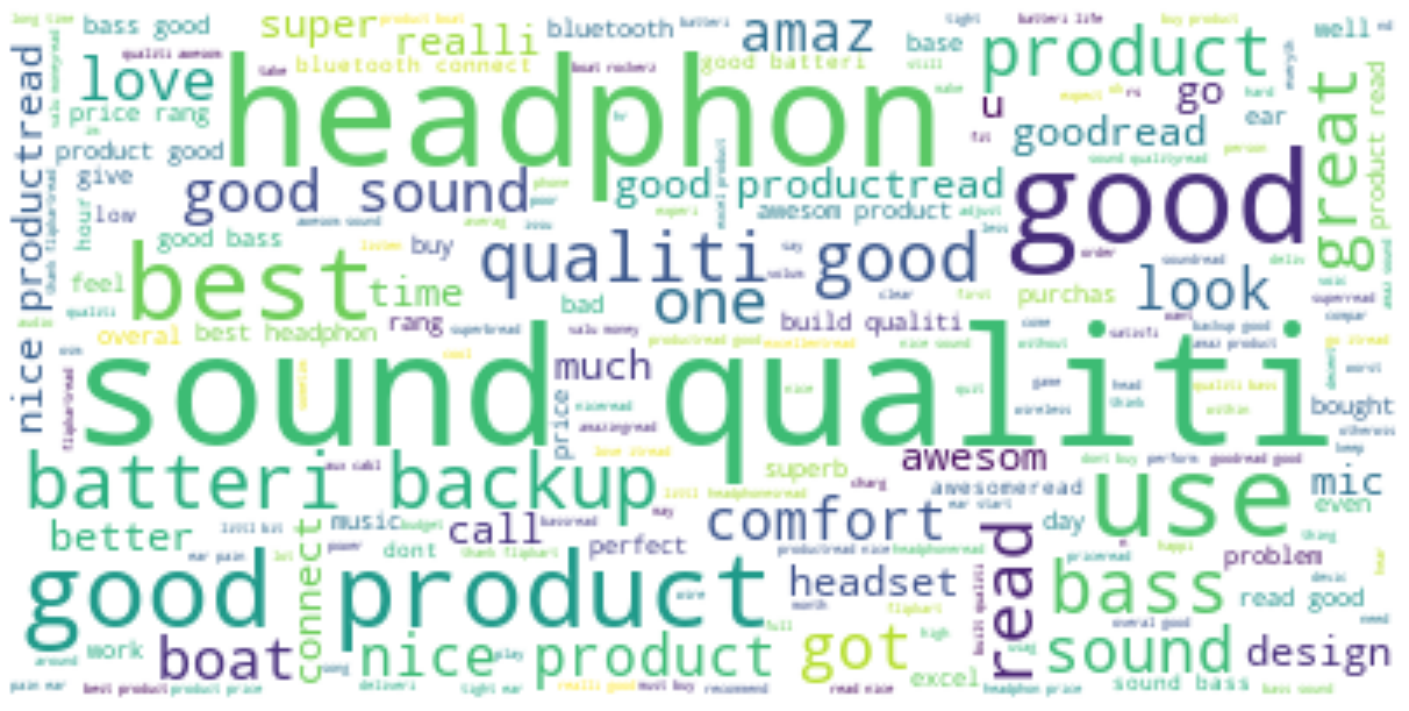

In [16]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretation of the results:

Generally customers wrote "qualiti", "sound", "headphone" and "good". But I cannot sure those words is the good for the product. To determine the positive or negative words for this product I should calculate the polarity score. Let's calculate these scores...

## Calculate the Polarity Scores

In [19]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Lenovo
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  nice produt like design lot  easi carri   look...     0.431     0.000   
1  awesom soundveri pretti see nd sound qualiti g...     0.471     0.000   
2  awesom sound qualiti pros  hrs batteri life in...     0.194     0.000   
3  think good product per qualiti also design qui...     0.393     0.049   
4  awesom bass sound qualiti good bettari long li...     0.260     0.000   

   Neutral  
0    0.569  
1    0.529  
2    0.806  
3    0.558  
4    0.740  


In [20]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [21]:
print(x)
print(y)
print(z)

3127.3110000000815
374.17000000000013
6474.495999999996


## Interpretation of the polarity scores:

I can say that generally customer has neutral experience for this headphone. So, this is bad for Flipkart. Because it can have worse affect on the sales. Then, I can try to determine the bad sides of this headphone using negative experience from customers who bought this product.

## Create a new dataframe

I create a new dataframe with customers who had a bad experience with this headphone.

In [25]:
data_neg = data[(data['Negative']>data['Positive']) & (data['Negative']>data['Neutral'])]

In [26]:
data_neg.head()

review  Positive  Negative  Neutral
1642  build qualiti worst broke within weekread     0.000     0.633    0.367
1665                     pain keep  minutesread     0.000     0.623    0.377
1667                 worth low cost chennairead     0.317     0.350    0.333
1713                   poor plastic qualityread     0.000     0.608    0.392
1770                start pain ear  minutesread     0.000     0.524    0.476

## Create a new WordCloud 

I want to determine that which words did use in the reviews.

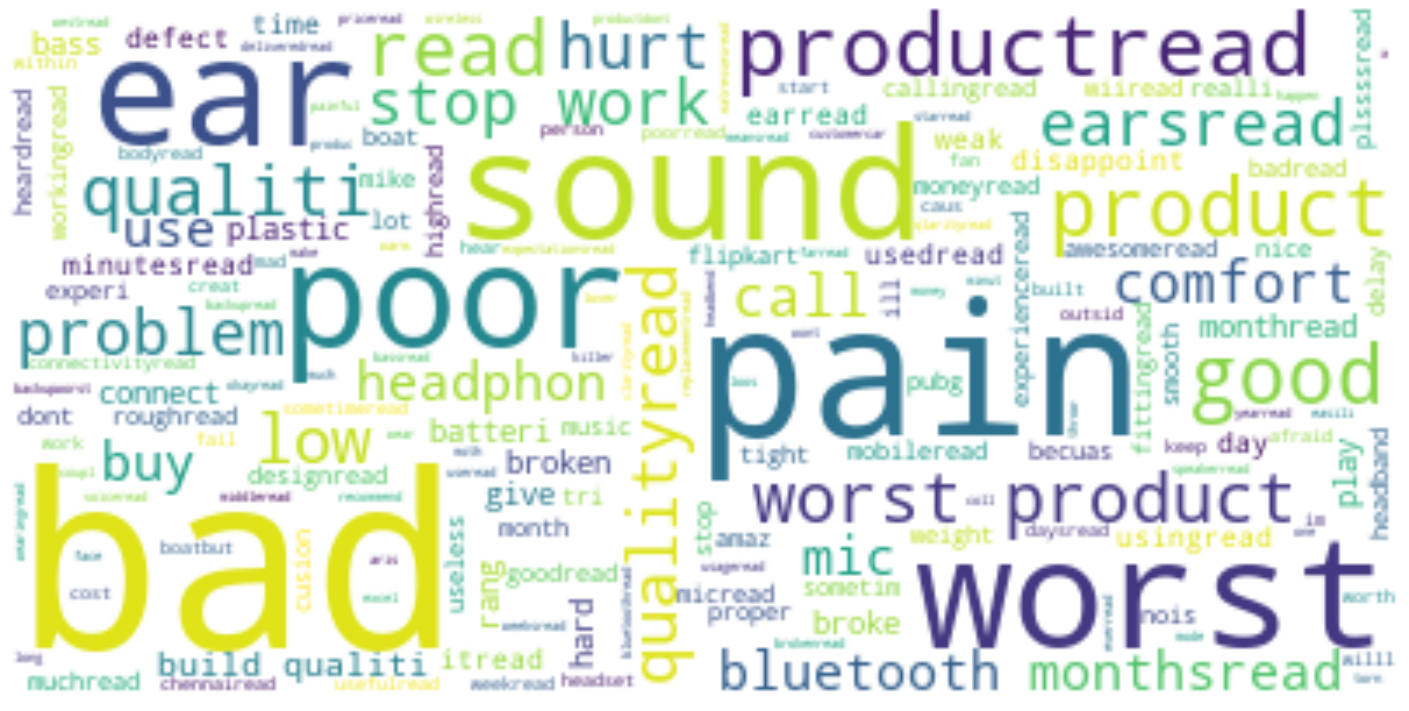

In [27]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretation of the WordCloud:

"bad", "sound", "ear", "pain", "sound", "poor", "worst" words was used by the customers who have a neagtive experience with this headphone. So, I can say that sound quality is not good.

On the other hand, "stop work", "hurt" and "bluetooth" words follow the previous words. Probably there are some connection problem with the devices further because of the "hurt" word, this product is not comfortable to use. 

As a result, I could find some drawbacks this headphone to improve the next production.

## Use different library to determine the stopwords

I used SpaCy library for stopwords

In [39]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'any', 'n’t', 'were', '‘s', "n't", 'due', 'forty', 'twelve', 'us', 'sometimes', 'whereupon', 'mostly', 'and', 'cannot', 'six', 'various', 'myself', 'their', 'your', 'yourself', 'seems', 'either', 'amount', 'her', 'over', 'however', 'very', 'anyhow', 'put', 'they', 'rather', 'back', 'last', 'full', 'under', 'perhaps', 'whether', 'ours', 'all', 'every', 'the', 'throughout', 'until', 'herself', 'why', 'whom', 'among', 'also', 'hereafter', 'name', "'ll", 'by', 'had', 'although', 'regarding', 'those', 'thereby', 'everywhere', 'within', 'next', 'hers', 'quite', 'most', 'own', 'nine', 'should', 'elsewhere', 'here', 'being', 'a', 'unless', 'give', 'eight', 'will', '‘ve', 'show', 'each', 'more', 'now', 'one', 'thence', 'part', 'first', 'itself', 'since', 'top', '’ll', 'he', "'s", 'indeed', 'into', 'became', 'onto', 'sixty', 'anyway', 'move', 'without', 'or', 'my', '’re', 'once', 'these', 'whoever', 'almost', 'thereafter', 'beside', "'re", 'too', 'further', 'few', 'serious', 'afterwards', 'beco

In [42]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in sw_spacy]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

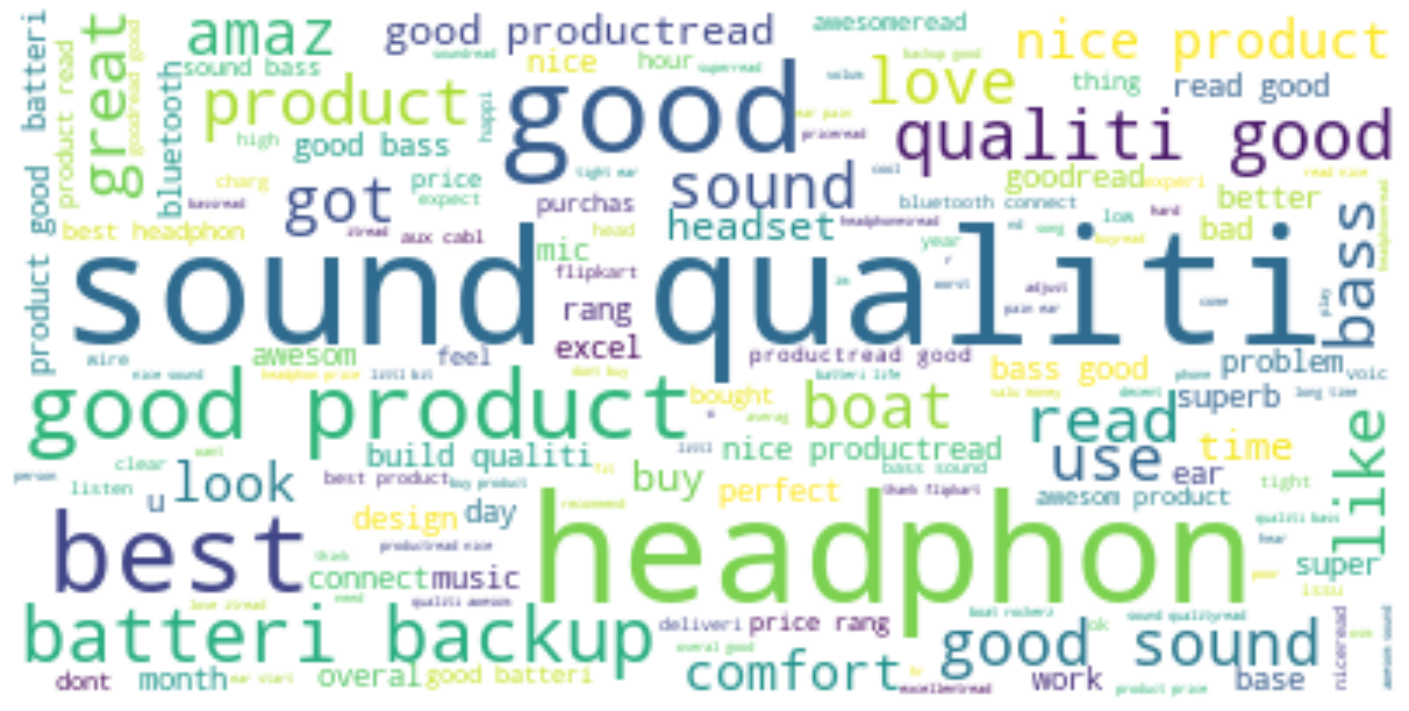

In [43]:
text = " ".join(i for i in data.review)
stopwords = set(sw_spacy)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretation of the WordCloud:

I can say that it is similar the NLTK results. There aren't big difference between them.

In [45]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Lenovo
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  nice produt like design lot  easi carri   look...     0.431     0.000   
1  awesom soundveri pretti nd sound qualiti good ...     0.521     0.000   
2  awesom sound qualiti pros  hrs batteri life in...     0.209     0.000   
3  think good product qualiti design good  m prod...     0.462     0.058   
4  awesom bass sound qualiti good bettari long li...     0.276     0.000   

   Neutral  
0    0.569  
1    0.479  
2    0.791  
3    0.480  
4    0.724  


In [46]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [47]:
print(x)
print(y)
print(z)

3220.40800000009
397.68900000000014
6356.860000000003


## Interpretation of the results with SpaCy Stopwords:

I can say that there are a little big negative experience with this product by using SpaCy Stopwords. Besides that positive experience was higher than the NLTK Model. Maybe I can find some new bad sides this product. To determine this I create a new dataframe and use WordCloud. Let's do this next cell :)

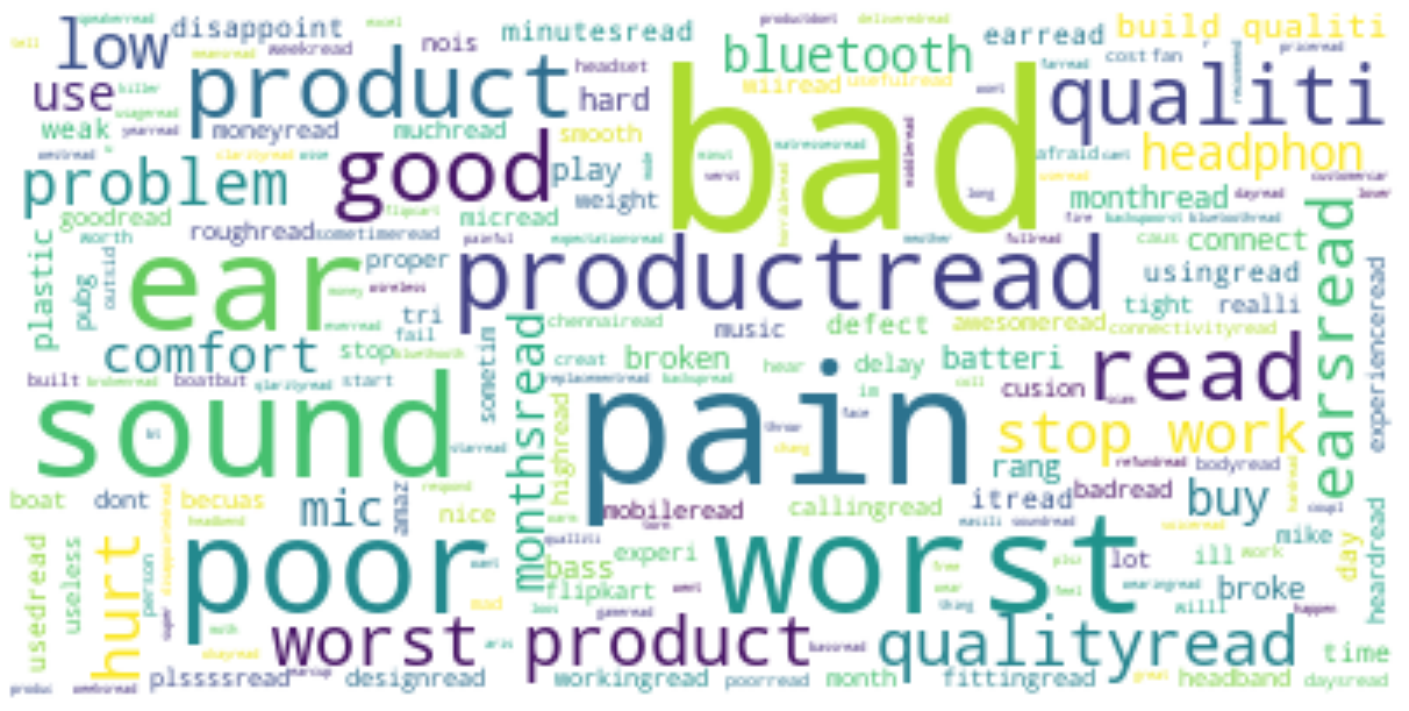

In [44]:
text = " ".join(i for i in data_neg.review)
stopwords = set(sw_spacy)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretation of the Negative experience:

It is like before, there are similar words.

In [33]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

frozenset({'amoungst', 'any', 'were', 'couldnt', 'due', 'forty', 'twelve', 'us', 'sometimes', 'whereupon', 'mostly', 'and', 'cannot', 'six', 'myself', 'their', 'your', 'yourself', 'seems', 'either', 'bill', 'amount', 'her', 'over', 'however', 'very', 'anyhow', 'put', 'they', 'rather', 'back', 'last', 'full', 'under', 'perhaps', 'fire', 'whether', 'ours', 'all', 'every', 'the', 'throughout', 'until', 'herself', 'why', 'thick', 'whom', 'among', 'also', 'hereafter', 'name', 'hasnt', 'by', 'had', 'although', 'those', 'thereby', 'everywhere', 'within', 'next', 'hers', 'most', 'own', 'nine', 'should', 'co', 'elsewhere', 'here', 'being', 'interest', 'a', 'give', 'eight', 'will', 'show', 'each', 'more', 'now', 'one', 'thence', 'part', 'first', 'itself', 'since', 'un', 'top', 'he', 'indeed', 'into', 'became', 'onto', 'sixty', 'anyway', 'move', 'without', 'or', 'my', 'once', 'these', 'whoever', 'almost', 'thereafter', 'beside', 'too', 'further', 'few', 'serious', 'afterwards', 'become', 'ltd', '

In [48]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in ENGLISH_STOP_WORDS]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

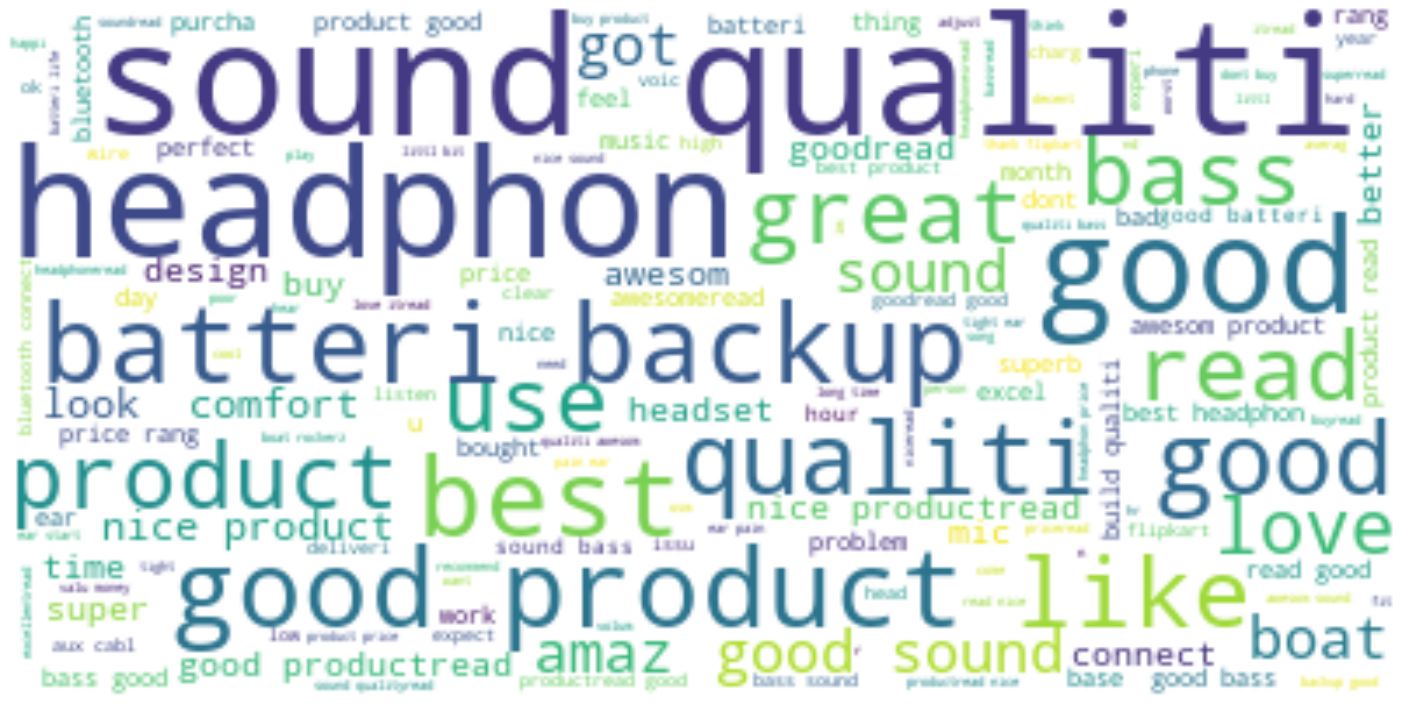

In [49]:
text = " ".join(i for i in data.review)
stopwords = set(ENGLISH_STOP_WORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Lenovo
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  nice produt like design lot  easi carri   look...     0.431     0.000   
1  awesom soundveri pretti nd sound qualiti good ...     0.521     0.000   
2  awesom sound qualiti pros  hrs batteri life in...     0.209     0.000   
3  think good product qualiti design good  m prod...     0.462     0.058   
4  awesom bass sound qualiti good bettari long li...     0.276     0.000   

   Neutral  
0    0.569  
1    0.479  
2    0.791  
3    0.480  
4    0.724  


In [51]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [52]:
print(x)
print(y)
print(z)

3236.708000000087
400.5769999999997
6337.727999999994


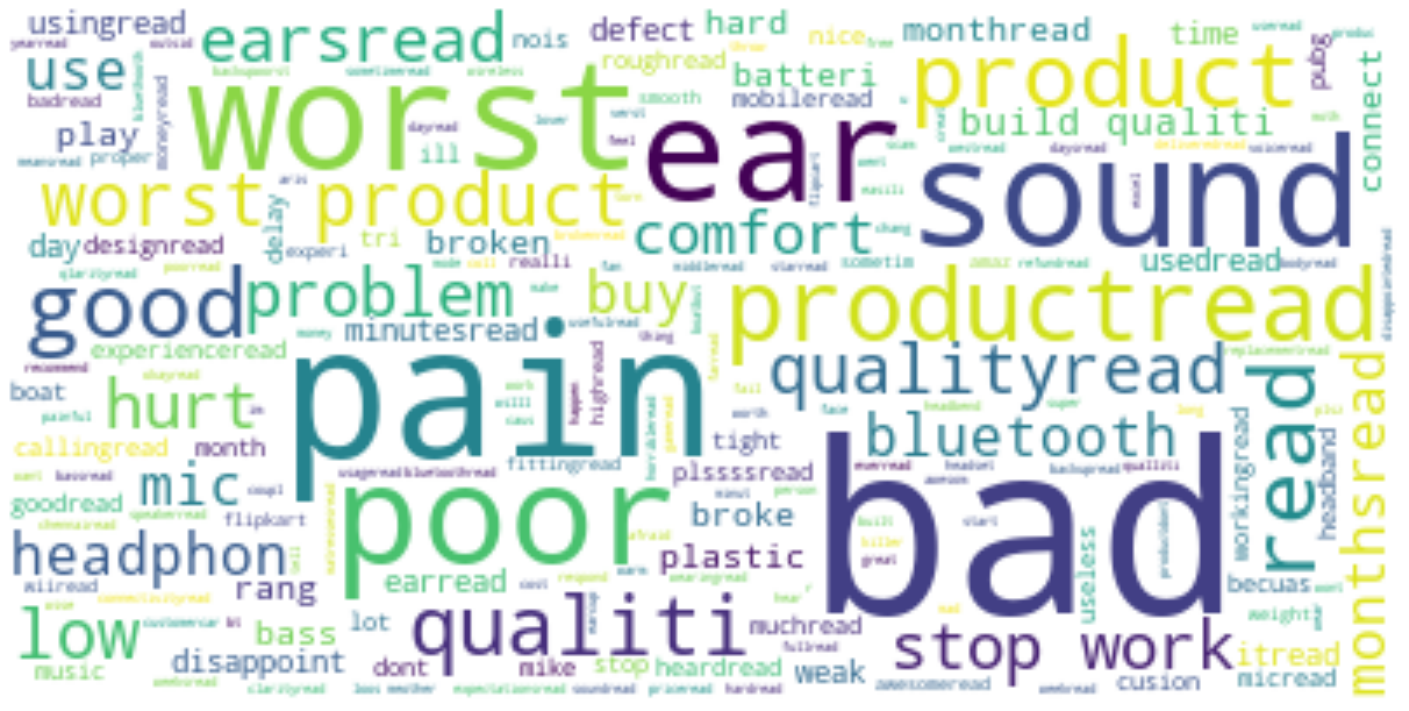

In [54]:
text = " ".join(i for i in data_neg.review)
stopwords = set(ENGLISH_STOP_WORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretation of the all three algorithms:

All in all, I can say that I can reach the similar results by using different stopwords libraries. But I can say that sci-kit learn stopwords library reduced the neutral experiences. So, in my opinion scikit learn is more suitable for this dataset to analyze the comment. Because the more drawbacks I know, the more I can improve the product.